<a href="https://colab.research.google.com/github/Venusandjupiter/MachineLearning/blob/main/VGGNET/VGGNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import dataloader
import train
import VGG
import torch
import torchinfo
from torch import nn
PATH = './dataset/'
Device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
conv_args = ((1,16),(1,32),(2,64),(2,128),(2,128))

VGG11 = VGG.VGG_Net(conv_args)

In [4]:
torchinfo.summary(VGG11,(1,1,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [1, 10]                   --
├─Sequential: 1-1                        [1, 16, 112, 112]         --
│    └─Conv2d: 2-1                       [1, 16, 224, 224]         160
│    └─ReLU: 2-2                         [1, 16, 224, 224]         --
│    └─MaxPool2d: 2-3                    [1, 16, 112, 112]         --
├─Sequential: 1-2                        [1, 32, 56, 56]           --
│    └─Conv2d: 2-4                       [1, 32, 112, 112]         4,640
│    └─ReLU: 2-5                         [1, 32, 112, 112]         --
│    └─MaxPool2d: 2-6                    [1, 32, 56, 56]           --
├─Sequential: 1-3                        [1, 64, 28, 28]           --
│    └─Conv2d: 2-7                       [1, 64, 56, 56]           18,496
│    └─Conv2d: 2-8                       [1, 64, 56, 56]           36,928
│    └─ReLU: 2-9                         [1, 64, 56, 56]           --
│  

In [5]:
!nvidia-smi

Mon Jan 16 15:47:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    49W / 400W |   1978MiB / 40536MiB |      5%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
train_data = dataloader.GetFashionMNIST(PATH,download=True,train=True)
val_data = dataloader.GetFashionMNIST(PATH,train=False,download=True)
train_iter = dataloader.iter_transform(train_data,2048,True)
val_iter = dataloader.iter_transform(val_data,2048,False)

Running on: A100-SXM4-40GB
=============================epochs:1========================================
train loss:1.762,train acc:37.71%, val_acc:68.11%
=============================epochs:2========================================
train loss:0.665,train acc:74.34%, val_acc:79.77%
=============================epochs:3========================================
train loss:0.473,train acc:82.31%, val_acc:83.83%
=============================epochs:4========================================
train loss:0.378,train acc:85.93%, val_acc:87.10%
=============================epochs:5========================================
train loss:0.341,train acc:87.39%, val_acc:88.21%
=============================epochs:6========================================
train loss:0.301,train acc:88.93%, val_acc:88.92%
=============================epochs:7========================================
train loss:0.273,train acc:89.84%, val_acc:89.45%
=============================epochs:8========================================

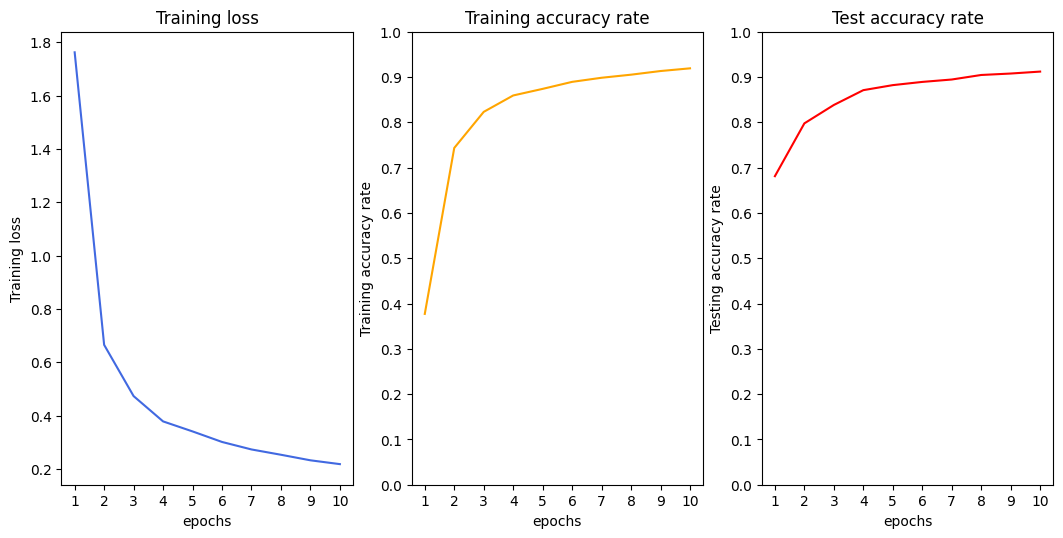

In [7]:
loss_fn = nn.CrossEntropyLoss()
train.train_loop(VGG11,loss_fn,10,1e-3,train_iter,val_iter,Device)